# HW 1 Problem 1: Linear Algebra and Python Review


<hr>

## Part A
*Vector dimensionality, magnitude, normalization, unit vectors, LaTeX*



**We'll start with this vector: $$v =
[ 9, 12 ]$$**



### 1.a
**How many dimensions does the vector have?**


<font color=#2AAA8A><span style="font-size:larger;"> **This vector has 2 dimensions**

### 1.b

**i. Calculate the L2‑normalized version of the vector (manually, not using code yet). Show the mathematical steps and/or explain your process. Use LaTeX to write out your answer.**

**ii. What does it mean, geometrically, that we've normalized this vector?**

*Don't worry if LaTeX (pronounced “LAY-tek” or “LAH-tek”) is new to you! Here's a quick [intro to math mode](https://colab.research.google.com/drive/11W7RwNC_Mnn0WtAB3GaWzMhm3E3jOGGu?authuser=2#scrollTo=N7NTSLLZfr0q), the most useful aspect of LaTeX for us. If you want a more thorough introduction, click [here](https://www.overleaf.com/learn/latex/Learn_LaTeX_in_30_minutes).*


<font color=#2AAA8A><span style="font-size:larger;">
Let
$$
v=\begin{bmatrix} 9 \\ 12 \end{bmatrix}.
$$
**i**
The L2 norm is:
$$
|\mathbf{v}|_2=\sqrt{9^2+12^2}=\sqrt{81+144}=\sqrt{225}=15.
$$
Then we can divide by the norm:
$$
\hat{\mathbf{v}}=\frac{\mathbf{v}}{|\mathbf{v}|_2}
=\frac{1}{15}
\begin{bmatrix}
9
\\
12
\end{bmatrix}
=\begin{bmatrix}
\frac{3}{5} 
\\
\frac{4}{5}
\end{bmatrix}
$$
**ii**
Normalizing a vector scales it to have length 1 without changing its direction.


### 1.c (code)

**Write a Python function using NumPy that takes a 1‑dimensional NumPy array (a vector) as input and returns a unit vector in the same direction. Also write code that demonstrates a call to your function.**

Your function should handle the case where the input vector has norm 0 in a reasonable way.

Note: In practice, you would likely perform this normalization in a single line rather than wrapping it in a separate function. Here we use a function to review common Python syntax.


In [35]:
import numpy as np

def unitize(vector):
    v = np.array(vector, dtype=float)
    factor = np.sqrt(np.sum(v ** 2))
    return v / factor

v = [9, 12]
v_unit = unitize(v)
print("Original vector:", v)
print("Normalized vector:", v_unit)

Original vector: [9, 12]
Normalized vector: [0.6 0.8]
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Part B
*Linear operations with vectors, linear independence/dependence, span and vector space*




In [36]:
# Helper code - RUN THIS FIRST
# This code generates the axis on which you can plot things (vectors in our case)
# Take a close look to see what the function 'make_plot' is doing

def make_plot():
  fig, ax = plt.subplots(figsize=(7, 7))
  ax.grid(alpha=0.4)
  ax.grid(alpha=0.4)
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.set_aspect('equal', adjustable='box')
  ax.set(
        xlim=[-10, 10], ylim=[-10, 10],
        xticks=np.arange(-10, 11), yticks=np.arange(-10, 11),
        xticklabels=[], yticklabels=[]
    )
  return fig,ax

### Linearly combining vectors

Consider the two vectors
\begin{equation}
\mathbf{x} = \begin{bmatrix}3 \\ 1 \end{bmatrix}, \mathbf{y} = \begin{bmatrix}-1 \\ 2 \end{bmatrix}.
\end{equation}

We can form a new vector $\mathbf{z}$ as a linear combination of $\mathbf{x}$ and $\mathbf{y}$. That is, for real numbers $a$ and $b$,

\begin{equation}
\mathbf{z} = a\mathbf{x} + b\mathbf{y}
\end{equation}



### 1.d (code)

**Write a function that allows you to calculate $\mathbf{z}$ based on $a$ and $b$ and then plots all three vectors in different colors.** 


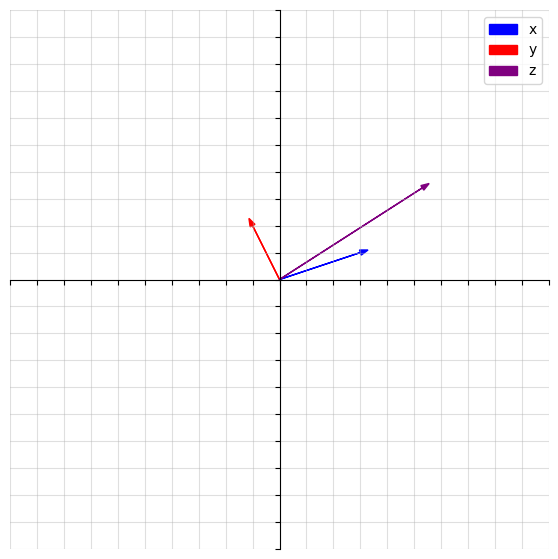

In [37]:
import matplotlib.pyplot as plt

# Define the function to calculate z and plot vectors
def plot_linear_combination(a, b):

    # Calculate z
    z = a * x + b * y


    # Create a figure and set some properties (we defined the function make_plot() above)
    fig, ax = make_plot()


    # Plot the vectors
    arrow_params = {'width': 0.08, 'length_includes_head': True}

    # Hint: use ax.arrow, a matplotlib function that allows you to create simple arrows in 2D plots
    x_arr = ax.arrow(0, 0, x[0], x[1], color="blue", label="x", head_width=0.2, head_length=0.3)
    y_arr = ax.arrow(0, 0, y[0], y[1], color="red", label="y", head_width=0.2, head_length=0.3)
    z_arr = ax.arrow(0, 0, z[0], z[1], color="purple", label="z", head_width=0.2, head_length=0.3)

    # Add legend
    ax.legend()
    


# Define vectors, coefficients, and call your function
x = np.array([3, 1])
y = np.array([-1, 2])
a = 2
b = 0.7

plot_linear_combination(a, b)


### 1.e

**Play with $a$ and $b$ to see how they affect $\mathbf{z}$.**

**i. By adjusting $a$ and $b$, can you get $\mathbf{z}$ to point anywhere in the 2D space?**

**ii. Would this be true for all $\mathbf{x}$ and $\mathbf{y}$ vectors? What's the general rule for when it works?**


<font color=#2AAA8A><span style="font-size:larger;">**1.e**

<font color=#2AAA8A><span style="font-size:larger;">**i.** Yes, by choosing different values of a and b, you can make z point in any direction in 2D as long as x and y are not colinear.

<font color=#2AAA8A><span style="font-size:larger;">**ii.** No, this is not true for all x and y. The general rule is that if x and y are linearly independent then their linear combinations fill the entire 2D plane. If x and y are linearly dependent then their linear combinations lie on a single line through the origin or just the origin if both are zero.



### 1.f

Now consider these four vectors:

\begin{equation}
\mathbf{a} =
\begin{bmatrix} 4 \\ 2 \\ 0 \end{bmatrix},\quad
\mathbf{b} = \begin{bmatrix} 1 \\ 0 \\ 3 \end{bmatrix},\quad
\mathbf{c} = \begin{bmatrix} 5 \\ 2 \\ 3 \end{bmatrix},\quad
\mathbf{d} = \begin{bmatrix} 3 \\ 3 \\ 2 \end{bmatrix}
\end{equation}

1. Generally, what is the **span** of a set of vectors?
2. Are these vectors linearly independent? Why or why not?
3. What is the span of the set of vectors $\{\mathbf{a}, \mathbf{b}, \mathbf{c}, \mathbf{d}\}$?
4. What is the span of the set of vectors $\{\mathbf{a}, \mathbf{b}, \mathbf{c}\}$?
5. What is the span of the set consisting of just the vector $\{\mathbf{a}\}$?
6. How could you create a set of vectors that can be linearly combined to reach all of 4D space ($\mathbb{R}^4$)? Give an example basis set.

<font color=#2AAA8A><span style="font-size:larger;"> ANSWER
1. The span of a set of vectors is all vectors you can make by taking linear combinations:
$$
span\{v_1,\dots,v_k\}=\left\{ c_1v_1+\cdots+c_kv_k | c_i \in R \right\}.
$$

2. No, they are not linearly independent. In $R^3$ any set of 4 vectors is dependent. Also,
$$
c = a + b
$$
because
$$
\begin{bmatrix}4\\2\\0\end{bmatrix}
+
\begin{bmatrix}1\\0\\3\end{bmatrix}
=
\begin{bmatrix}5\\2\\3\end{bmatrix}.
$$

3. The span of $\{a, b, c, d\}$ is
$$
span\{a, b, c, d\}=R^3.
$$

4. Since $c = a + b$,
$$
span\{a, b, c\}
=span\{a, b\},
$$
which is a 2D plane through the origin in $\mathbb{R}^3$.

5. The span of $\{a\}$ is a line through the origin.

6. To reach all of $\mathbb{R}^4$, you need 4 linearly independent vectors like
$$
\left\{
\begin{bmatrix}1\\0\\0\\0\end{bmatrix},
\begin{bmatrix}0\\1\\0\\0\end{bmatrix},
\begin{bmatrix}0\\0\\1\\0\end{bmatrix},
\begin{bmatrix}0\\0\\0\\1\end{bmatrix}
\right\}.
$$


## Part C
*Dot product*


**One of the most common and useful algebraic operations in computational neuroscience is the dot product:**

\begin{equation}
r = \mathbf{x}\cdot\mathbf{k}
\end{equation}


### 1.g

There are two common ways to define the dot product of two vectors.

Let $\mathbf{x}, \mathbf{k} \in \mathbb{R}^n$, and let $r$ denote their dot product.

* Algebraic definition: $r$ is the sum of the products of the corresponding components of $\mathbf{x}$ and $\mathbf{k}$.
* Geometric definition: $r$ is the product of the magnitudes (lengths) of the vectors and the cosine of the angle $\theta$ between them.

Using LaTeX, write down both of these definitions as equations for $r$.

Algebraic definition:
$$
r = x_1k_1 + x_2k_2 + \cdots + x_nk_n.
$$
or
$$
r = \sum_{i=1}^{n} x_i k_i
$$

Geometric definition:
$$
r = |x|,|k|\cos(\theta).
$$


### 1.h

Let $\mathbf{x}$ and $\mathbf{y}$ be vectors in $\mathbb{R}^4$ (each has 4 elements). If
$$r = \mathbf{x} \cdot \mathbf{y},$$
what is the dimension (shape) of $r$?


<font color=#2AAA8A><span style="font-size:larger;"> **The dot product of two vectors is a scalar, so r has dimension 1.**

### 1.i (code)

There are two easy ways to compute the dot product between two numpy arrays. One is a single character operator, and another is a built-in numpy function. **Fill in the code below to show both methods.**


In [38]:
x = np.array([2, 3, 1, 0])
y = np.array([1, 4, 3, 7])

dot_prod1 = x @ y
dot_prod2 = np.dot(x, y)

print(dot_prod1==dot_prod2)

True


### 1.j

**Concept of a Dot Product**

Write a conceptual definition of a dot product. Your target audience is a high-schooler, so keep it simple and intuitive! 

Include the following in your explanation:
1. When will the dot product be zero, positive, and negative?
2. Is the dot product commutative? (ie. does A·B = B·A?)


<font color=#2AAA8A><span style="font-size:larger;">The dot product combines two vectors to produce a single number that tells how much they point in the same direction.
It is positive when the vectors point mostly the same way, zero when they are perpendicular, and negative when they point in opposite directions. Intuitively, it measures how much one vector “lines up” with the other.
The dot product is commutative meaning $$A \cdot B = B \cdot A$$.


<br><br><br><br> _Credits: some questions adapted from Neuromatch Academy_